In [9]:
## Import functions
import os
import openpyxl
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import json
from llm_demos.llama2.embeddings import llama_embed
from llm_demos.llama2.gguf import importance_f, classification
from llm_demos.llama2.class_prompt import classification_prompt
from llm_demos.llama2.prompt1 import class_prompt
from llm_demos.llama2.prompt2 import uptake_prompt
from llm_demos.llama2.prompt3 import question_prompt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
file_path = '/home/frattitamayo/memory_module/CodingDiscourseAnalysis/CollabWriteAnalysisTest.xlsm'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name='Test', parse_dates=['Message Time'])
observations = []
times = []

for index, row in df.iterrows():
    # Construct the observation for each row
    time_origin = row['Message Time']
    origin = f"Question: {row['Topic']}, Pseudonym: {row['Pseudonym']}"
    # origin = f"{row['Pseudonym']}"
    value = row['Message']
    observation = (time_origin, origin, value)
     #observation = [(origin_1, value_1), (origin_2, value_2), ..., (origin_n, value_n)]
    observations.append(observation)

In [4]:
class Observation:
    def __init__(self, time_origin, origin, value, ): # Origin, Emitter, Value
        self.time_origin = time_origin
        self.origin = origin # Where it came from
        self.value = value # What it contains

    def __str__(self,): #{self.origin}
        return "{"+ f"[{self.time_origin}] {self.origin}: \"{self.value}\"" + "}"
    
observations1 = [Observation(idx, origin, value) for idx, (time_origin, origin, value) in enumerate(observations)]
print(observations1)

[<__main__.Observation object at 0x7e6f38a48700>, <__main__.Observation object at 0x7e6f38a4ac50>, <__main__.Observation object at 0x7e6f38a4a950>, <__main__.Observation object at 0x7e6f38a4a770>, <__main__.Observation object at 0x7e6f38a4ac20>, <__main__.Observation object at 0x7e6f38a48310>, <__main__.Observation object at 0x7e6f38a4a8c0>, <__main__.Observation object at 0x7e6f38a48970>, <__main__.Observation object at 0x7e6f38a4ad70>]


In [6]:
def biDirectionalWindow(observations):
    results = []
    for indx, (obs) in enumerate(observations):
        temp_prompt = class_prompt.replace("$MESSAGE$", observations[indx].__str__())
        if indx != 0:
            temp_prompt = temp_prompt.replace("$CON", observations[indx-1].__str__())
        if indx+1 < len(observations):
            temp_prompt = temp_prompt.replace("TEXT$", observations[indx+1].__str__())
        result = classification(temp_prompt)
        results.append(result)
    return results
f_result = biDirectionalWindow(observations1)


Llama.generate: prefix-match hit


```json
{
    "intent": "Social",
    "rationale": "The message 'Hello.' classifies as a social interaction since it is an initial greeting and does not directly address any specific content or task-related procedural question."
}
```


llama_print_timings:        load time =     216.82 ms
llama_print_timings:      sample time =       7.20 ms /    61 runs   (    0.12 ms per token,  8471.05 tokens per second)
llama_print_timings: prompt eval time =   46800.34 ms /  1592 tokens (   29.40 ms per token,    34.02 tokens per second)
llama_print_timings:        eval time =    8854.91 ms /    61 runs   (  145.16 ms per token,     6.89 tokens per second)
llama_print_timings:       total time =   56076.99 ms /  1653 tokens
Llama.generate: prefix-match hit


```json
{
    "intent": "Deliberation",
    "rationale": "The message 'My assumption is' implies that Cassandra Winfred is sharing her interpretation or thoughts on the content which fits into the 'Deliberation' category."
}
```


llama_print_timings:        load time =     216.82 ms
llama_print_timings:      sample time =       7.29 ms /    62 runs   (    0.12 ms per token,  8503.63 tokens per second)
llama_print_timings: prompt eval time =    7331.87 ms /   239 tokens (   30.68 ms per token,    32.60 tokens per second)
llama_print_timings:        eval time =    8902.06 ms /    61 runs   (  145.94 ms per token,     6.85 tokens per second)
llama_print_timings:       total time =   16409.93 ms /   300 tokens
Llama.generate: prefix-match hit


```json
{
    "intent": "Deliberation",
    "rationale": "The message "that the emphasis on barbarism implies that she sent him to the lion." is a deliberation because it discusses an interpretation of content."
}
```


llama_print_timings:        load time =     216.82 ms
llama_print_timings:      sample time =       7.05 ms /    60 runs   (    0.12 ms per token,  8513.05 tokens per second)
llama_print_timings: prompt eval time =    7731.15 ms /   244 tokens (   31.69 ms per token,    31.56 tokens per second)
llama_print_timings:        eval time =    8576.46 ms /    59 runs   (  145.36 ms per token,     6.88 tokens per second)
llama_print_timings:       total time =   16480.76 ms /   303 tokens


``

Llama.generate: prefix-match hit


`json
{
    "intent": "Deliberation",
    "rationale": "The message "that the emphasis on barbarism implies that she sent him to the lion." is an interpretation of the content and relates to the discussion about the meaning or interpretation of content."
}
```


llama_print_timings:        load time =     216.82 ms
llama_print_timings:      sample time =       7.86 ms /    67 runs   (    0.12 ms per token,  8519.84 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    9757.33 ms /    67 runs   (  145.63 ms per token,     6.87 tokens per second)
llama_print_timings:       total time =    9913.97 ms /    68 tokens


``

Llama.generate: prefix-match hit


`json
{
    "intent": "Deliberation",
    "rationale": "The message 'that the emphasis on barbarism implies that she sent him to the lion.' is a deliberation because it discusses the interpretation and meaning of the content."
}
```


llama_print_timings:        load time =     216.82 ms
llama_print_timings:      sample time =       7.45 ms /    63 runs   (    0.12 ms per token,  8455.24 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    9208.11 ms /    63 runs   (  146.16 ms per token,     6.84 tokens per second)
llama_print_timings:       total time =    9350.91 ms /    64 tokens
Llama.generate: prefix-match hit


```json
{
    "intent": "Deliberation",
    "rationale": "The message 'I agree with Cassandra's noticing' is a response to Cassandra's interpretation and contributes to the discussion about the content meaning, therefore it belongs to the Deliberation class."
}
```


llama_print_timings:        load time =     216.82 ms
llama_print_timings:      sample time =       8.44 ms /    71 runs   (    0.12 ms per token,  8415.31 tokens per second)
llama_print_timings: prompt eval time =    7730.26 ms /   252 tokens (   30.68 ms per token,    32.60 tokens per second)
llama_print_timings:        eval time =   10293.31 ms /    70 runs   (  147.05 ms per token,     6.80 tokens per second)
llama_print_timings:       total time =   18224.01 ms /   322 tokens
Llama.generate: prefix-match hit


```json
{
    "intent": "Seminar",
    "rationale": "The message \"of the author's word choice of barbarism.\" relates to the discussion about the meaning or interpretation of content, therefore it fits in the Seminar intent."
}
```


llama_print_timings:        load time =     216.82 ms
llama_print_timings:      sample time =       7.73 ms /    65 runs   (    0.12 ms per token,  8408.80 tokens per second)
llama_print_timings: prompt eval time =    7524.53 ms /   240 tokens (   31.35 ms per token,    31.90 tokens per second)
llama_print_timings:        eval time =    9516.67 ms /    65 runs   (  146.41 ms per token,     6.83 tokens per second)
llama_print_timings:       total time =   17225.40 ms /   305 tokens
Llama.generate: prefix-match hit


```json
{
    "intent": "UX",
    "rationale": "The message "I loved the addition of "}" expresses the user's opinion about the content or media, which fits into the UX (User Experience) class."
}
```


llama_print_timings:        load time =     216.82 ms
llama_print_timings:      sample time =       7.25 ms /    61 runs   (    0.12 ms per token,  8411.47 tokens per second)
llama_print_timings: prompt eval time =    8174.33 ms /   240 tokens (   34.06 ms per token,    29.36 tokens per second)
llama_print_timings:        eval time =    8720.33 ms /    60 runs   (  145.34 ms per token,     6.88 tokens per second)
llama_print_timings:       total time =   17068.01 ms /   300 tokens


``

Llama.generate: prefix-match hit


`json
{
    "intent": "UX",
    "rationale": "The message 'I loved the addition of "' relates to the user's opinion about the content or media, making it fall under UX (User eXperience) category."
}
```


llama_print_timings:        load time =     216.82 ms
llama_print_timings:      sample time =       7.59 ms /    64 runs   (    0.12 ms per token,  8434.37 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    9310.41 ms /    64 runs   (  145.48 ms per token,     6.87 tokens per second)
llama_print_timings:       total time =    9455.94 ms /    65 tokens


``

Llama.generate: prefix-match hit


`json
{
    "intent": "UX",
    "rationale": "The message \"I loved the addition of \" relates to user’s opinion about the IMapBook interface or media."
}
```


llama_print_timings:        load time =     216.82 ms
llama_print_timings:      sample time =       6.02 ms /    51 runs   (    0.12 ms per token,  8473.17 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    7451.51 ms /    51 runs   (  146.11 ms per token,     6.84 tokens per second)
llama_print_timings:       total time =    7567.04 ms /    52 tokens
Llama.generate: prefix-match hit


```json
{
    "intent": "Deliberation",
    "rationale": "The message \"Her lover would die and never love another.\" relates to a deliberation intent as it discusses an interpretation or possible outcome of the story."
}
```


llama_print_timings:        load time =     216.82 ms
llama_print_timings:      sample time =       7.25 ms /    61 runs   (    0.12 ms per token,  8409.15 tokens per second)
llama_print_timings: prompt eval time =    7931.71 ms /   248 tokens (   31.98 ms per token,    31.27 tokens per second)
llama_print_timings:        eval time =    8914.59 ms /    61 runs   (  146.14 ms per token,     6.84 tokens per second)
llama_print_timings:       total time =   17024.03 ms /   309 tokens
Llama.generate: prefix-match hit


```json
{
    "intent": "Deliberation",
    "rationale": "The message contains analysis and interpretation of the content (the king and princess's actions) and connects it to real-life situations."
}
```


llama_print_timings:        load time =     216.82 ms
llama_print_timings:      sample time =       6.60 ms /    56 runs   (    0.12 ms per token,  8486.13 tokens per second)
llama_print_timings: prompt eval time =    7688.31 ms /   247 tokens (   31.13 ms per token,    32.13 tokens per second)
llama_print_timings:        eval time =    7975.70 ms /    55 runs   (  145.01 ms per token,     6.90 tokens per second)
llama_print_timings:       total time =   15830.87 ms /   302 tokens
Llama.generate: prefix-match hit


```json
{
    "intent": "Procedure",
    "rationale": "The message "Submitted" indicates a procedure-related action has been completed."
}
```


llama_print_timings:        load time =     216.82 ms
llama_print_timings:      sample time =       5.07 ms /    43 runs   (    0.12 ms per token,  8489.63 tokens per second)
llama_print_timings: prompt eval time =    5280.97 ms /   172 tokens (   30.70 ms per token,    32.57 tokens per second)
llama_print_timings:        eval time =    6095.13 ms /    42 runs   (  145.12 ms per token,     6.89 tokens per second)
llama_print_timings:       total time =   11502.37 ms /   214 tokens


``

Llama.generate: prefix-match hit


`json
{
    "intent": "Procedure",
    "rationale": "The message "Submitted" indicates completion or submission of an assigned task, which relates to a procedure intent."
}
```


llama_print_timings:        load time =     216.82 ms
llama_print_timings:      sample time =       5.90 ms /    50 runs   (    0.12 ms per token,  8478.89 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    7260.97 ms /    50 runs   (  145.22 ms per token,     6.89 tokens per second)
llama_print_timings:       total time =    7378.28 ms /    51 tokens


``

Llama.generate: prefix-match hit


`json
{
    "intent": "Procedure",
    "rationale": "The message "Submitted" indicates a procedure intent as it refers to completing and submitting an assignment."
}
```


llama_print_timings:        load time =     216.82 ms
llama_print_timings:      sample time =       5.70 ms /    48 runs   (    0.12 ms per token,  8425.49 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    6967.25 ms /    48 runs   (  145.15 ms per token,     6.89 tokens per second)
llama_print_timings:       total time =    7074.14 ms /    49 tokens


``

Llama.generate: prefix-match hit


`json
{
    "intent": "Procedure",
    "rationale": "The message 'Submitted' relates to a procedure intent because it indicates an action taken in response to a task or assignment."
}
```


llama_print_timings:        load time =     216.82 ms
llama_print_timings:      sample time =       6.23 ms /    53 runs   (    0.12 ms per token,  8501.76 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    7710.05 ms /    53 runs   (  145.47 ms per token,     6.87 tokens per second)
llama_print_timings:       total time =    7828.47 ms /    54 tokens


In [7]:
print (f_result)

['Social', 'Deliberation', 'Deliberation', 'Deliberation', 'Seminar', 'UX', 'Deliberation', 'Deliberation', 'Procedure']


# Testing

In [8]:
file_path = '/home/frattitamayo/memory_module/CodingDiscourseAnalysis/CollabWriteAnalysisTest.xlsm'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name='Test', parse_dates=['Message Time'])
y_true = []
for index, row in df.iterrows():
    val = row['R2DiscussionType']
    y_true.append(val)
print (y_true)

['Social', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Procedure']


In [10]:
y_pred = f_result

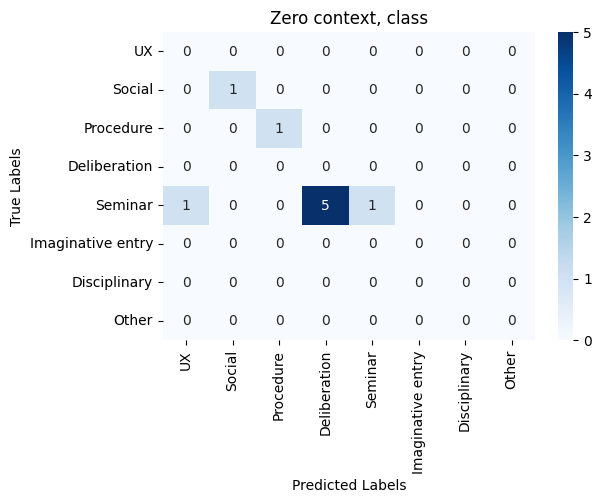

In [11]:
# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=["UX", "Social", "Procedure", "Deliberation", "Seminar", "Imaginative entry", "Disciplinary", "Other"])

# Create a heatmap using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["UX", "Social", "Procedure", "Deliberation", "Seminar", "Imaginative entry", "Disciplinary", "Other"], yticklabels=["UX", "Social", "Procedure", "Deliberation", "Seminar", "Imaginative entry", "Disciplinary", "Other"])

# Add labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Zero context, class")

# Show the plot
plt.show()